In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os

path = "/content/drive/MyDrive/ImageProcessing/Assignment-29"

In [3]:
cd /content/drive/MyDrive/ImageProcessing/Assignment-29

/content/drive/MyDrive/ImageProcessing/Assignment-29


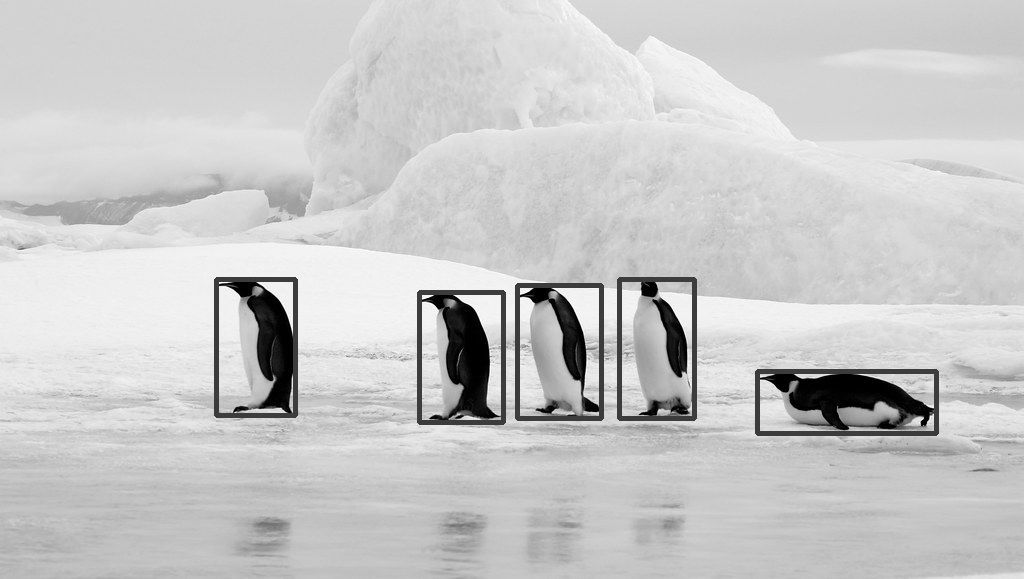

number of penguin in this image :  5


True

In [55]:
img_gray = cv2.imread(os.path.join(path, "Inputs/penguin3.jpeg"), cv2.IMREAD_GRAYSCALE)


#------------------penguin1.jpg as input--------------------

# ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) #penguin4
# thresh = cv2.dilate(thresh,kernel,iterations = 20) #penguin4
# thresh = cv2.erode(thresh,kernel,iterations = 20) #penguin4


# contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# num = 0

# for cnt in contours:
#     area = cv2.contourArea(cnt)

#     if area >10000:

#         num = num + 1
#         x, y, w, h = cv2.boundingRect(cnt)
#         cv2.rectangle(img_gray, (x, y), (x +w, y+ h), (60, 60, 60), 4)

# cv2_imshow(img_gray)
# print("number of penguin in this image : ", num)
# cv2.imwrite(os.path.join(path, "Output/penguin1.jpg"), img_gray)



#-------------------penguin2.jpg as input--------------------

# ret,thresh = cv2.threshold(img_gray,150,255,cv2.THRESH_BINARY_INV) #penguin2
# contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# num = 0

# for cnt in contours:
#     area = cv2.contourArea(cnt)

#     if area >800:

#         num = num + 1
#         x, y, w, h = cv2.boundingRect(cnt)
#         cv2.rectangle(img_gray, (x, y), (x +w, y+ h), (60, 60, 60), 4)

# cv2_imshow(img_gray)
# print("number of penguin in this image : ", num)
# cv2.imwrite(os.path.join(path, "Output/penguin2.jpg"), img_gray)



#-----------penguin3.jpeg as input--------------------

ret,thresh = cv2.threshold(img_gray,185,255,cv2.THRESH_BINARY_INV) 

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
num = 0

for cnt in contours:
    area = cv2.contourArea(cnt)

    if area >4000:

        num = num + 1
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img_gray, (x, y), (x +w, y+ h), (60, 60, 60), 4)

cv2_imshow(img_gray)
print("number of penguin in this image : ", num)
cv2.imwrite(os.path.join(path, "Output/penguin3.jpg"), img_gray)



#---------------------penguin4.jpeg as input--------------------

# ret,thresh = cv2.threshold(img_gray,150,255,cv2.THRESH_BINARY_INV) #penguin4
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) #penguin4
# thresh = cv2.dilate(thresh,kernel,iterations = 1) #penguin4

# contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# num = 0

# for cnt in contours:
#     area = cv2.contourArea(cnt)

#     if area >4000:

#         num = num + 1
#         x, y, w, h = cv2.boundingRect(cnt)
#         cv2.rectangle(img_gray, (x, y), (x +w, y+ h), (60, 60, 60), 4)

# cv2_imshow(img_gray)
# print("number of penguin in this image : ", num)
# cv2.imwrite(os.path.join(path, "Output/penguin4.jpg"), img_gray)


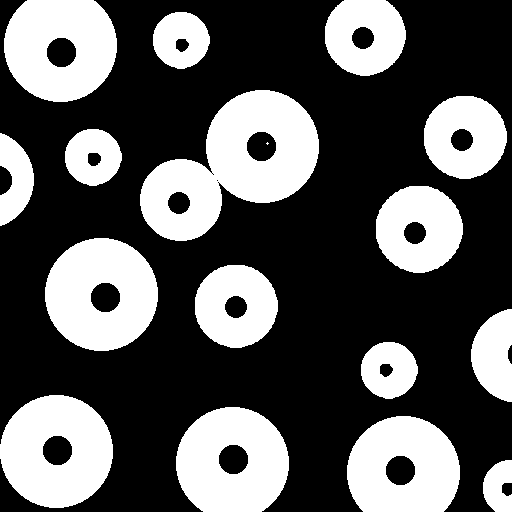

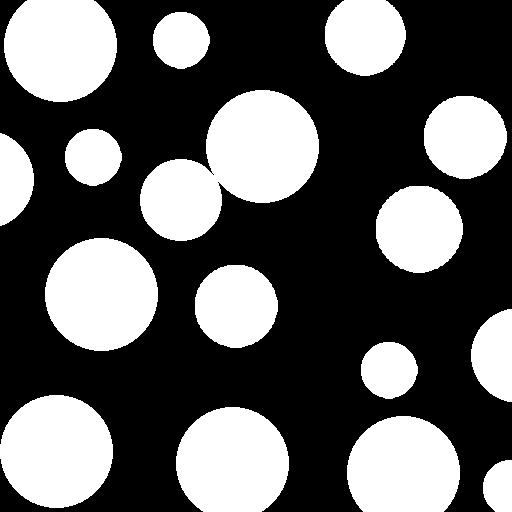

True

In [49]:
img_gray = cv2.imread(os.path.join(path, "Inputs/gerdalies.tif"), cv2.IMREAD_GRAYSCALE)
cv2_imshow(img_gray)

thresh = 255 - img_gray
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area = cv2.contourArea(cnt)

    if area <800:

        x, y, w, h = cv2.boundingRect(cnt)
        img_gray[y : y + h, x : x + w ]= 255

cv2_imshow(img_gray)
cv2.imwrite(os.path.join(path, "Output/gerdalies.jpg"), img_gray)

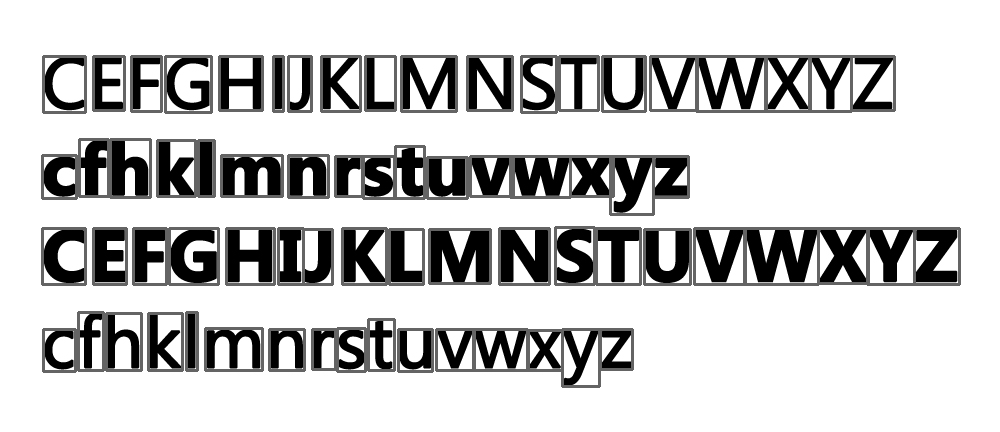

In [71]:
img_gray = cv2.imread(os.path.join(path, "Inputs/OCR.jpg"), cv2.IMREAD_GRAYSCALE)
# cv2_imshow(img_gray)

thresh = 255 - img_gray
# cv2_imshow(thresh)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
erode = cv2.erode(thresh,kernel,iterations = 2)

contours, _ = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print(len(contours))
# cv2_imshow(dilated)

i = 1
for cnt in contours:
    area = cv2.contourArea(cnt)

    if area >150:

        x, y, w, h = cv2.boundingRect(cnt)
        roi = img_gray[y-2 : y + h + 2, x-2 : x + w +2 ]
        cv2.imwrite(os.path.join(path, "Output/OCR/" + f"{i}.jpg"), roi)

        cv2.rectangle(img_gray, (x-2, y-2), (x +w+2, y+ h+2), (100, 100, 100), 2)

        i = i + 1

cv2.imwrite(os.path.join(path, "Output/OCR/OCR.jpg"), img_gray)
cv2_imshow(img_gray)

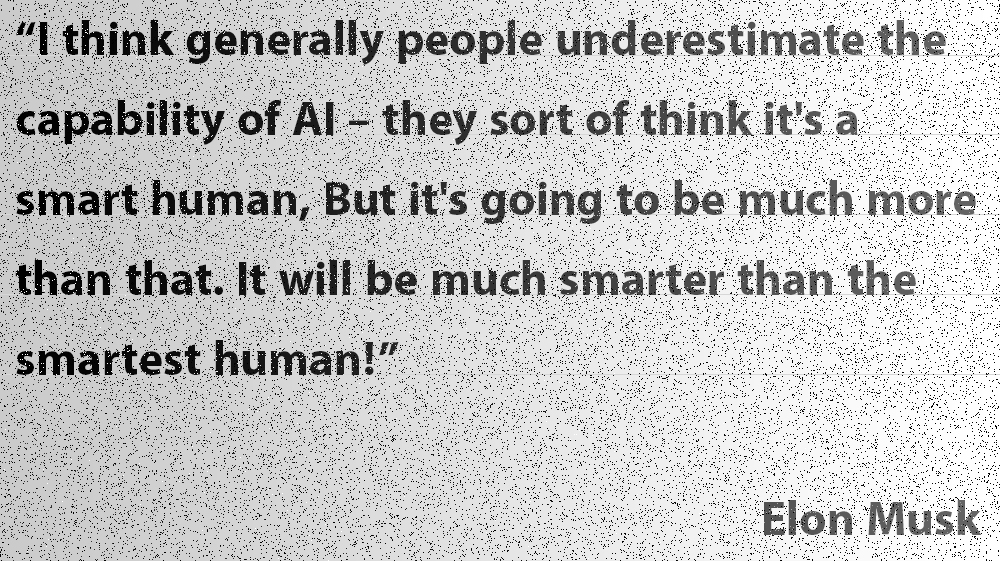

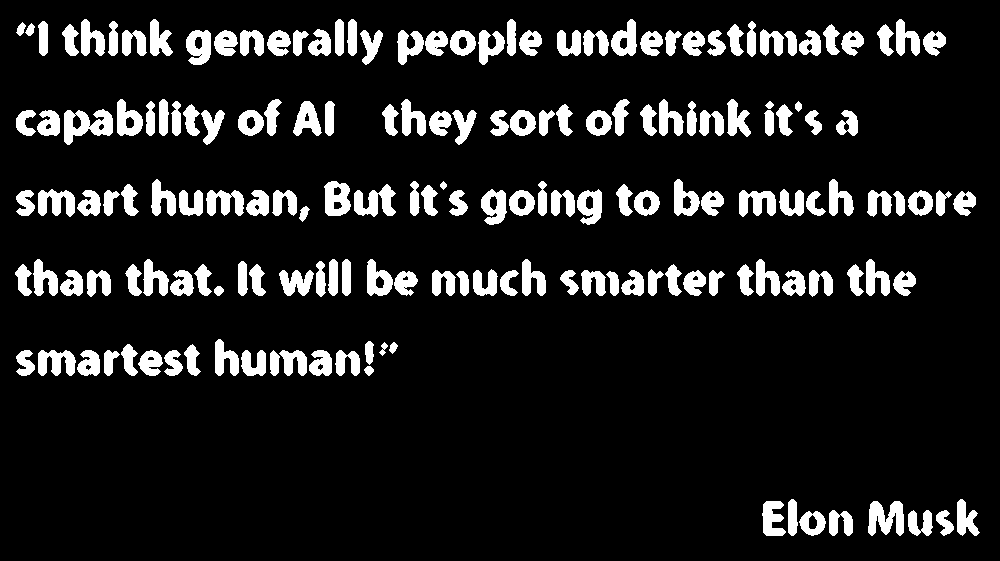

172


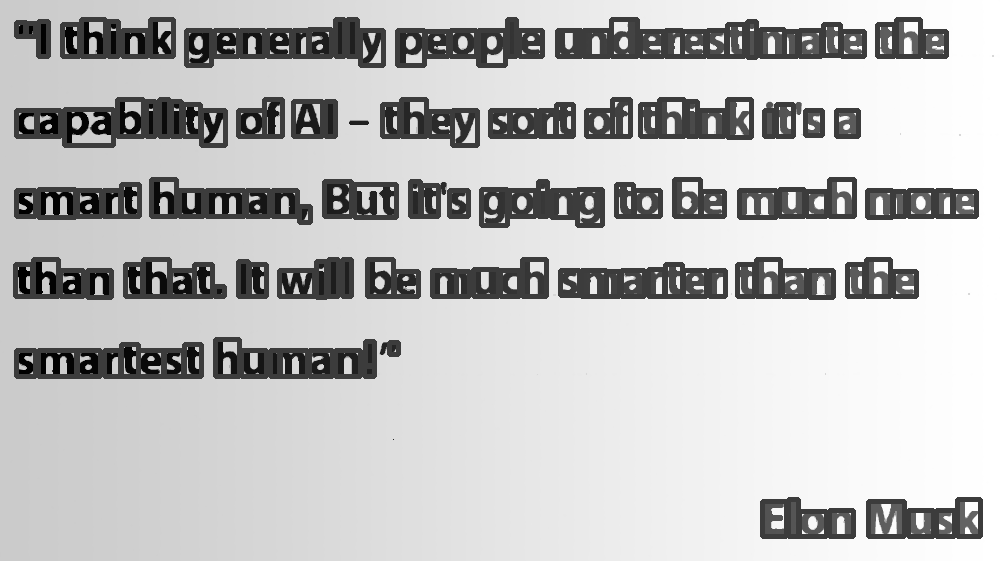

In [32]:
img_gray = cv2.imread(os.path.join(path, "Inputs/noisey_OCR.jpg"), cv2.IMREAD_GRAYSCALE)
cv2_imshow(img_gray)
img_gray = cv2.medianBlur(img_gray, 3)
img_gray = cv2.medianBlur(img_gray, 3)
ret,thresh = cv2.threshold(img_gray,100,255,cv2.THRESH_BINARY_INV)

# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilated = cv2.erode(thresh,kernel,iterations = 2)
dilated = cv2.dilate(dilated,kernel,iterations = 3) # dilate
# dilated = cv2.erode(dilated,kernel,iterations = 1)

# thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 57, 2)
# thresh = 255 - thresh
cv2_imshow(dilated)

contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

X = []
Y = []
W = []
H = []

x = []
y = []
w = []
h = []

# x, y, w, h = cv2.boundingRect(contours[:])

# for cnt in contours:
#     x_, y_, w_, h_ = cv2.boundingRect(cnt)
#     x.append(x_)
#     y.append(y_)
#     w.append(w_)
#     h.append(h_)

# l = [1,2,3,4,4,5,5,6,1]
# n = set([x_ for x_ in x if x.count(x_) > 1])

# for n_ in n:
#     m = np.where(x == set([x_ for x_ in x if x.count(x_) > 1]))

# print(len(m[0]))

# set([1, 4/\, 5])

#     area = cv2.contourArea(cnt)

#     # if area >20:
#       i = i+1
#       x, y, w, h = cv2.boundingRect(cnt)
#       cv2.rectangle(img_gray, (x, y), (x +w, y+ h), (60, 60, 60), 4)
# Coordinates = np.zeros((2))
Coordinates = []
Coordinates_ = []
vector = np.zeros((4))

for cnt in contours:
    area = cv2.contourArea(cnt)
    x, y, w, h = cv2.boundingRect(cnt)



    if area >50:

      vector = x, y, w, h
      Coordinates.append(cnt)
      # print("*")
      X.append(x)
      Y.append(y)
      W.append(w)
      H.append(h)
      # i = i+1
      # x, y, w, h = cv2.boundingRect(cnt)
      cv2.rectangle(img_gray, (x, y), (x +w, y+ h), (60, 60, 60), 4)

    elif area <50:

      vector = x, y, w, h
      Coordinates_.append(cnt)

      # m = np.where(contours[0] == x)
      # print(m[0]) 

      # x.append(x)
      # y.append(y)
      # w.append(w)
      # h.append(h)

      # x.append(x)
      # y.append(y)
      # w.append(w)
      # h.append(h)

# pixels = []
# for cnt in Coordinates_:

#   x, y, w, h = cv2.boundingRect(cnt)
#   X, Y, W, H = cv2.boundingRect(cnt)

#   num = np.where(X = x)
#   pixels.append(num)

# print(pixels)

cv2_imshow(img_gray)


# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# dilated = cv2.dilate(thresh,kernel,iterations = 13) # dilate